In [1]:
# import packages/modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Load CSV file into a pandas dataframe
df = pd.read_csv('../../data/postproduction__credit_card_approval.csv')

# Description

In [3]:
# Display description
df.describe().to_csv('../../data/description__credit_card_approval.csv')

# BOXPLOT

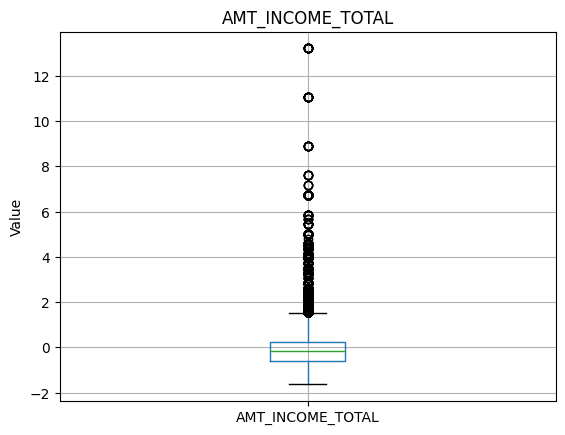

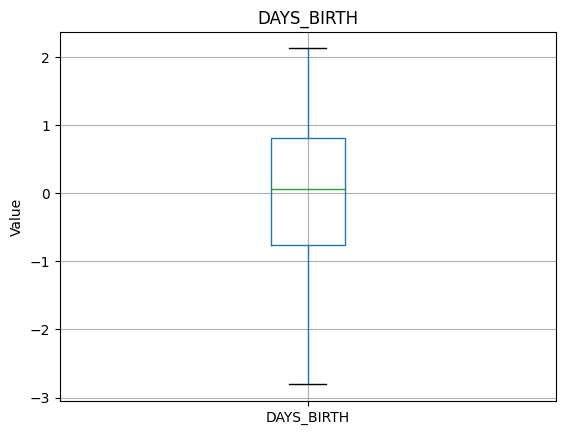

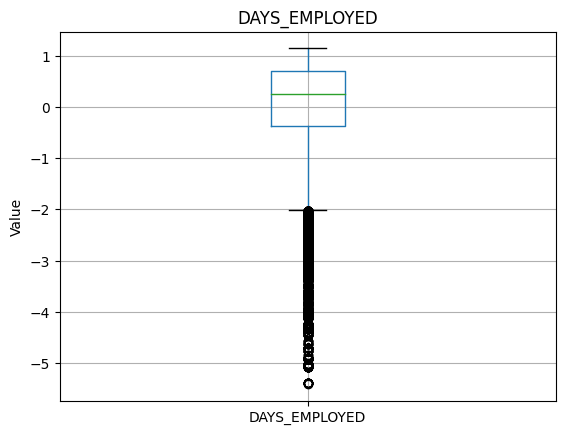

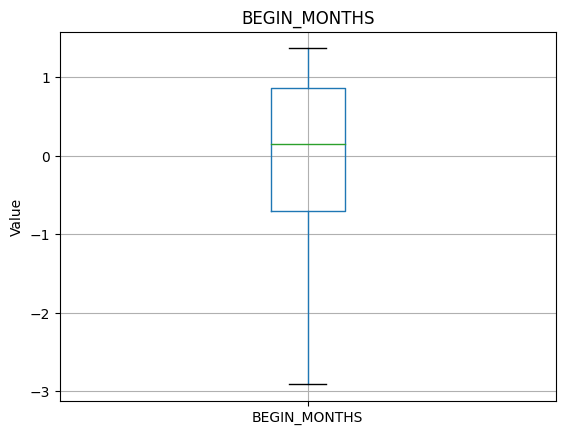

In [4]:
# Display boxplots for numeric columns
continuous_columns = ["AMT_INCOME_TOTAL", "DAYS_BIRTH", "DAYS_EMPLOYED", "BEGIN_MONTHS"]

for column in continuous_columns:
    fig, ax = plt.subplots()
    df.boxplot(ax=ax, column=column)

    ax.set_ylabel('Value')
    ax.set_title(column)

    plt.savefig(f'../../media/analyse/{column}__BOXPLOT.png')

# HEATMAP

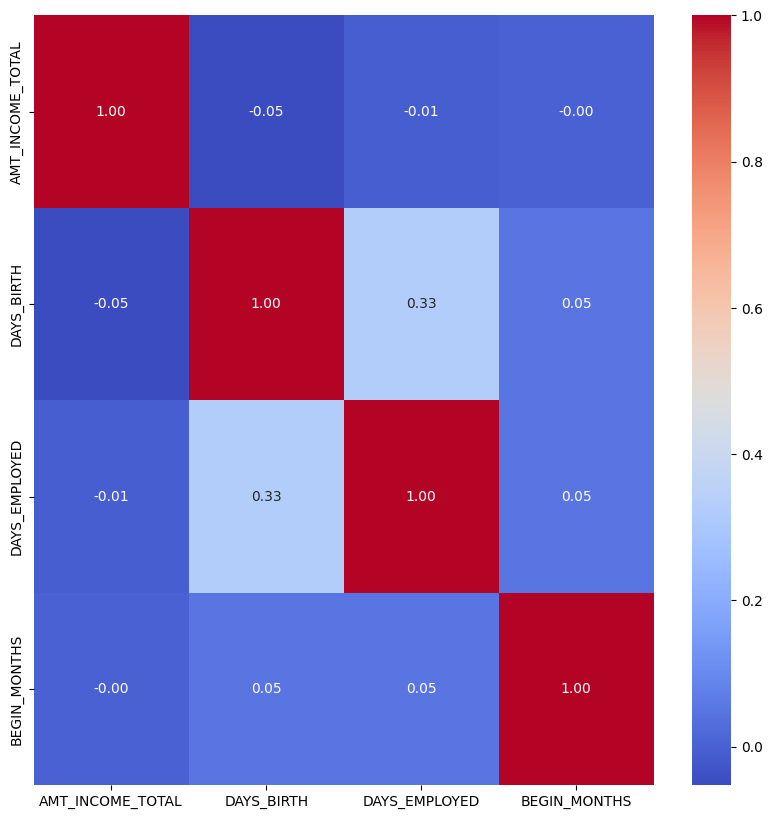

In [5]:
corr_matrix = df[continuous_columns].corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.savefig(f'../../media/analyse/HEATMAP.png')

# PAIR PLOT

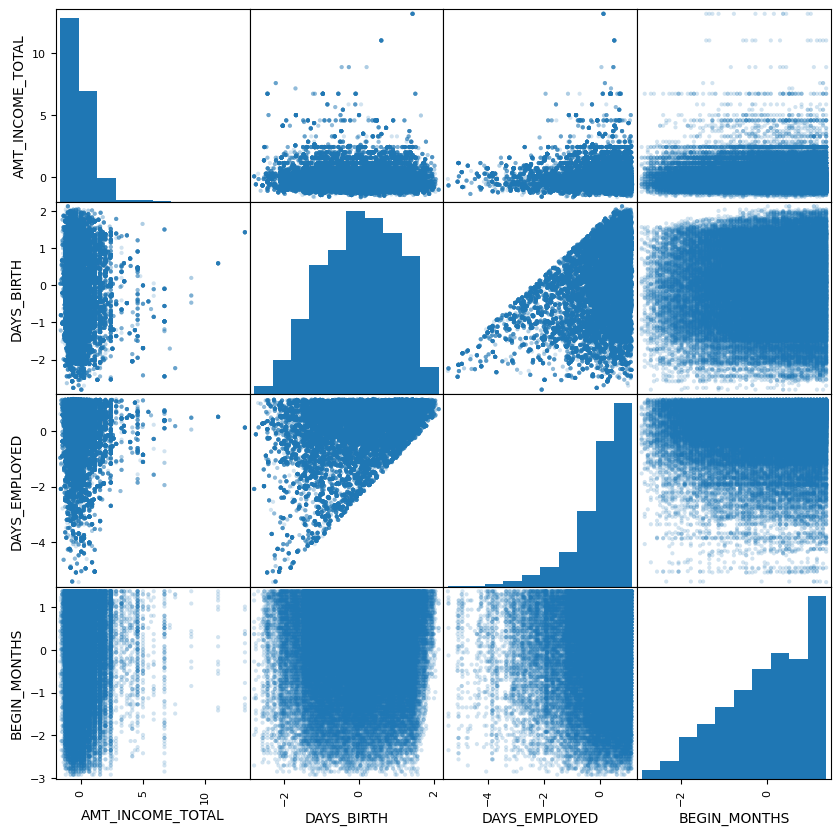

In [6]:
# pair plot
pd.plotting.scatter_matrix(df[continuous_columns], alpha=0.2, figsize=(10, 10), diagonal='hist')
plt.savefig('../../media/analyse/PAIR_PLOT.png')

In [7]:
# Load CSV file into a pandas dataframe - before preprocessing
_df = pd.read_csv('../../data/reduced__credit_card_approval.csv')

/Users/michalzajac/Library/Caches/pypoetry/virtualenvs/mow-QOMKVymr-py3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:447: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


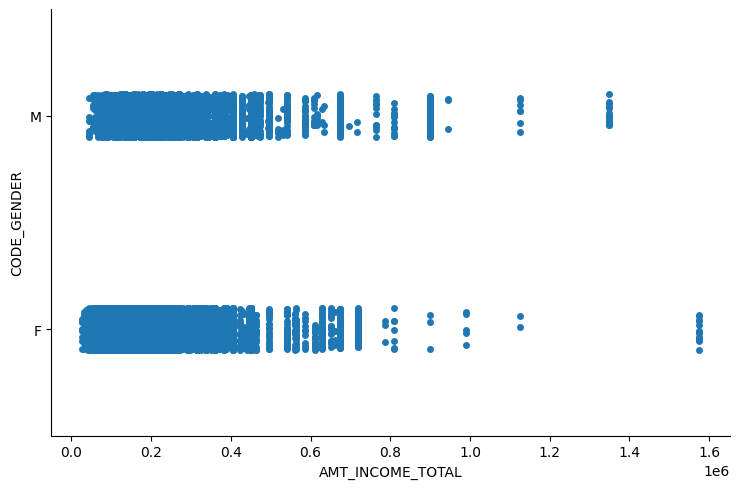

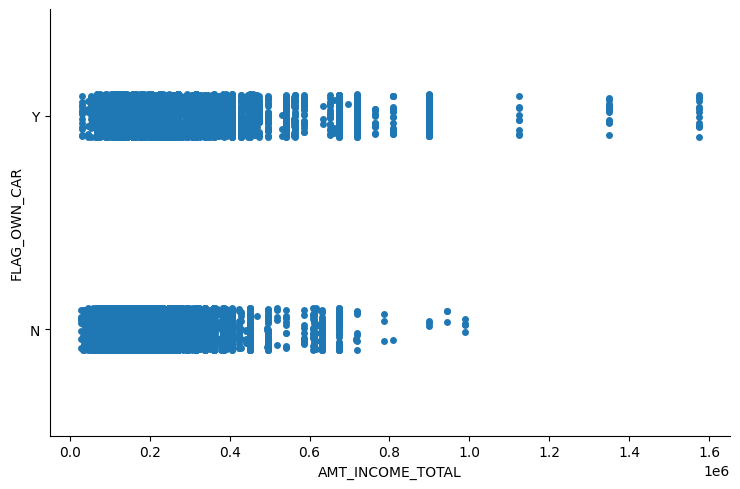

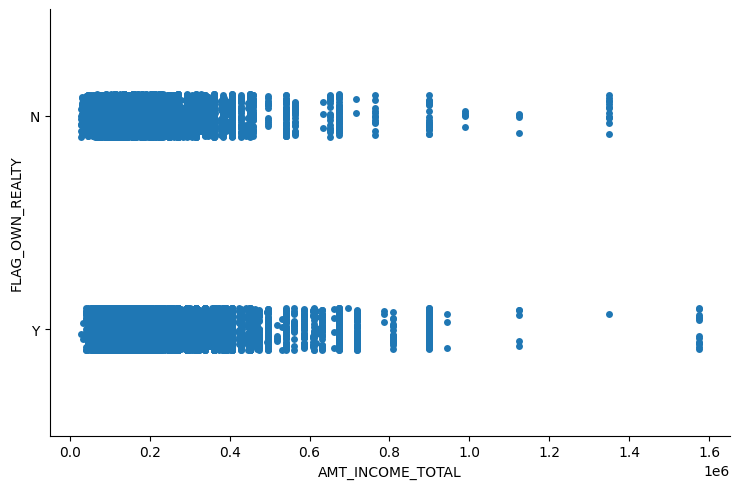

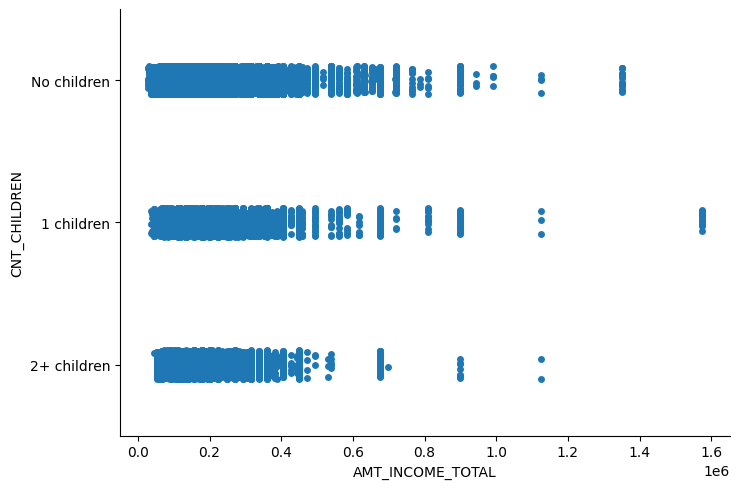

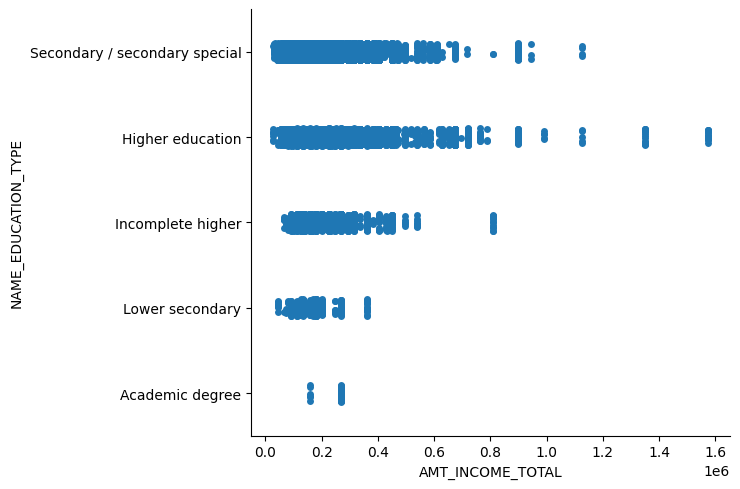

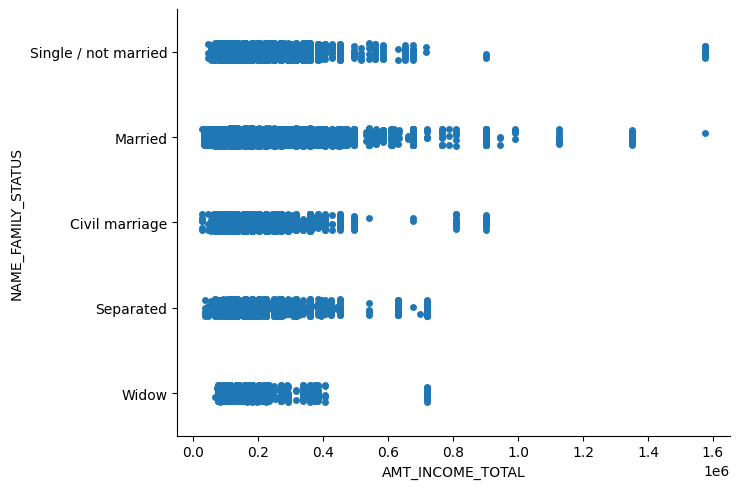

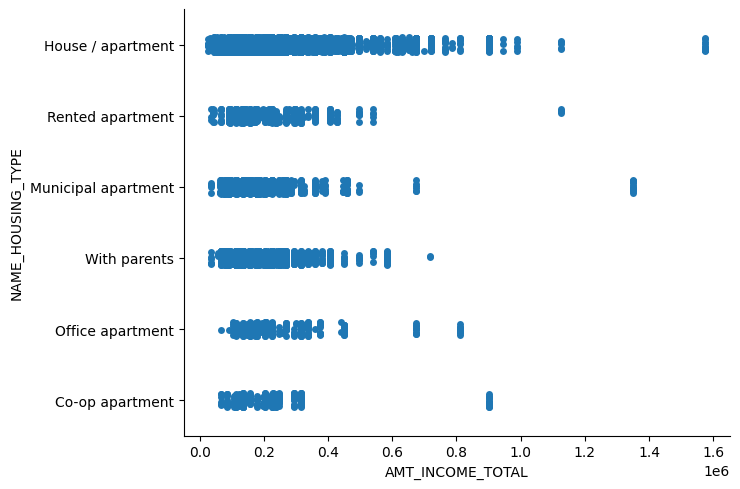

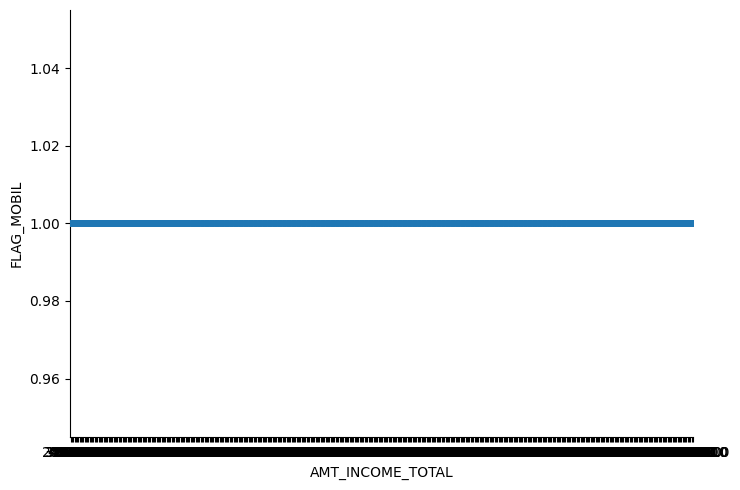

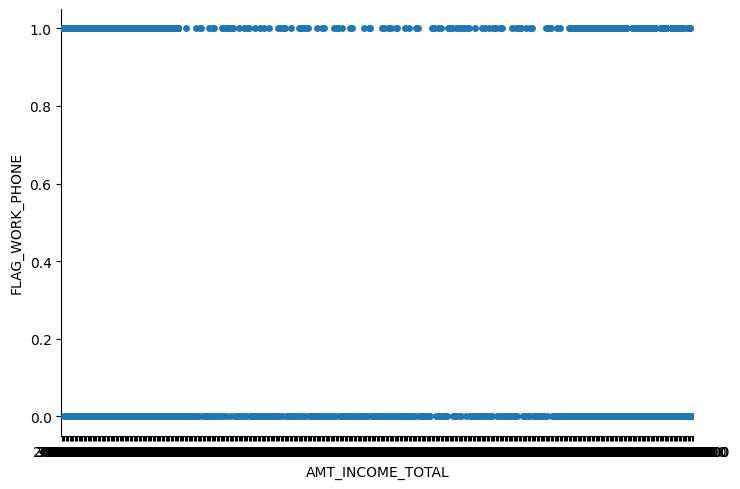

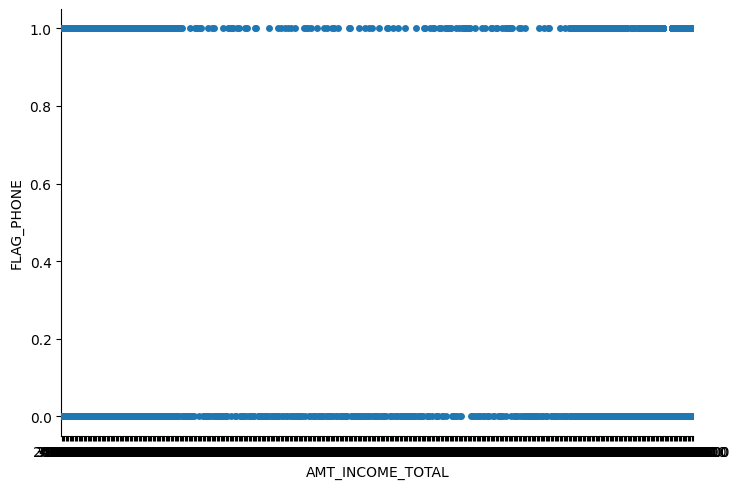

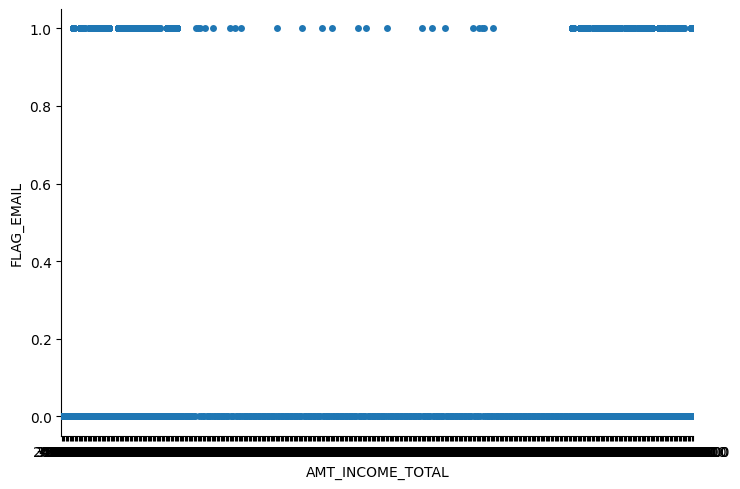

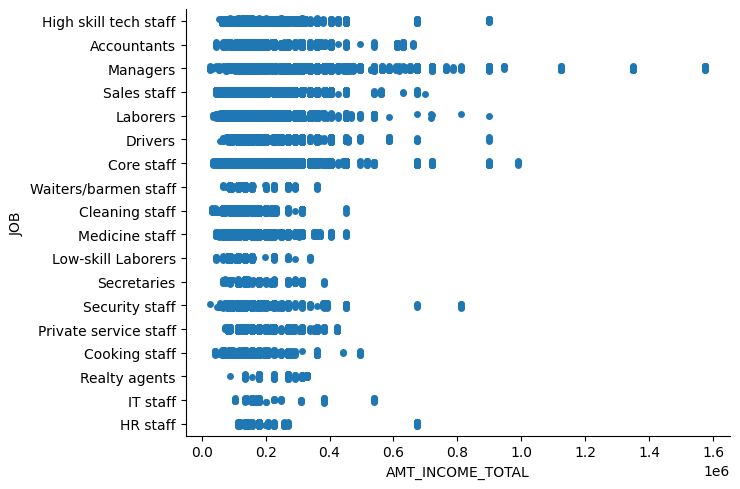

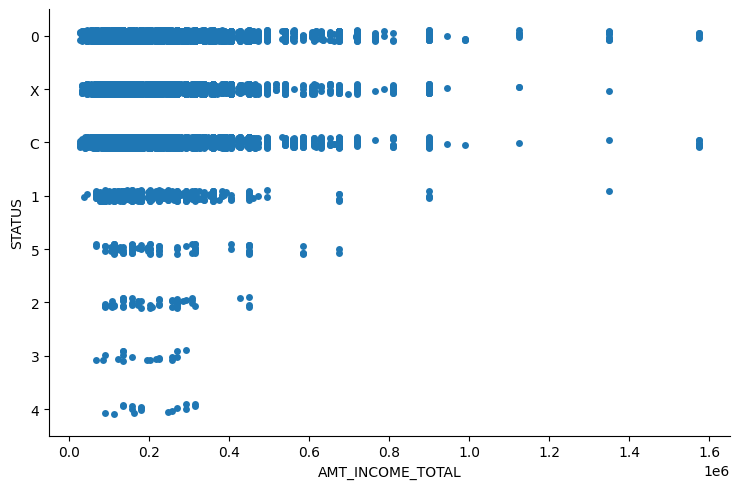

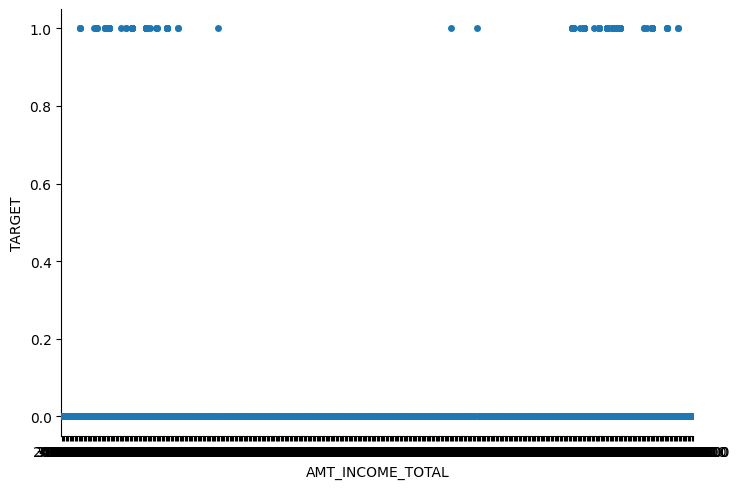

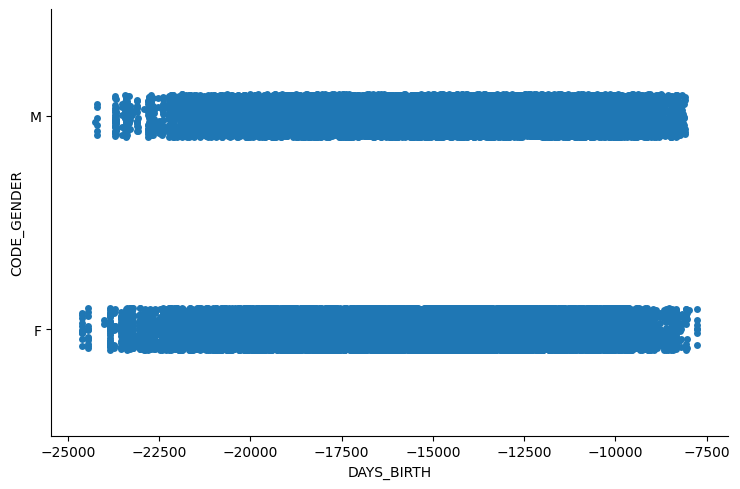

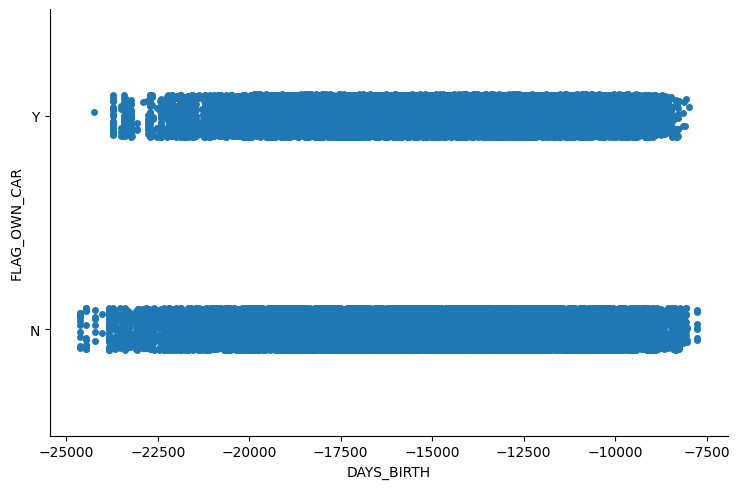

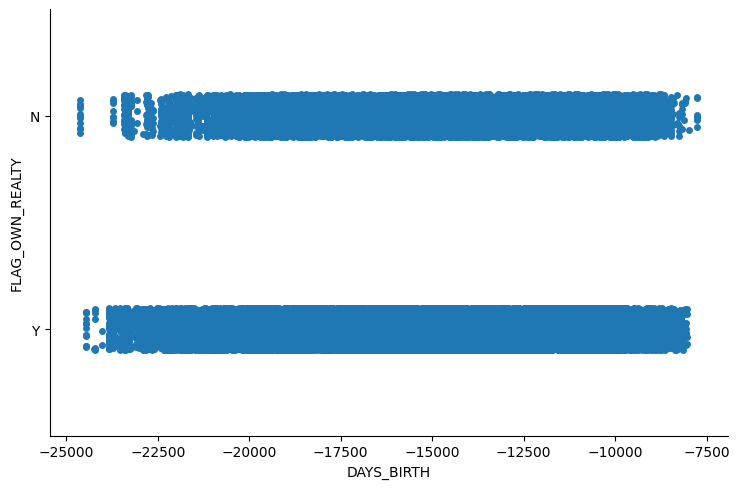

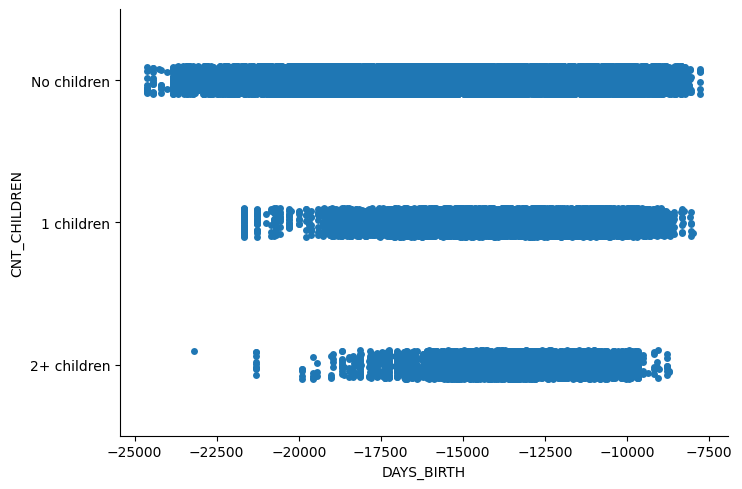

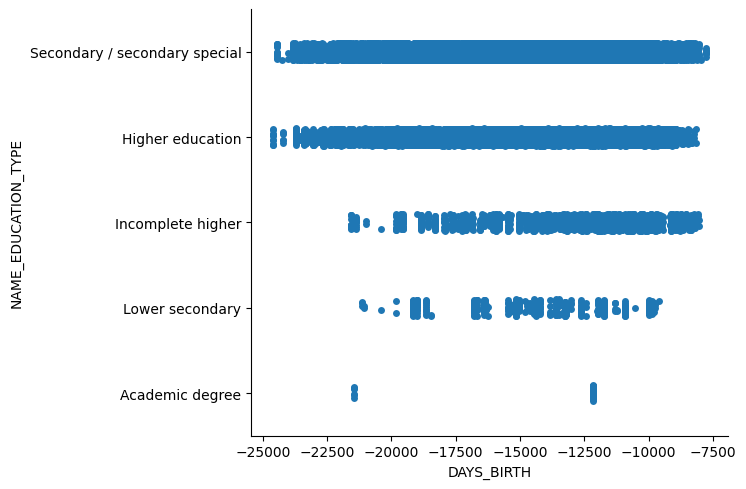

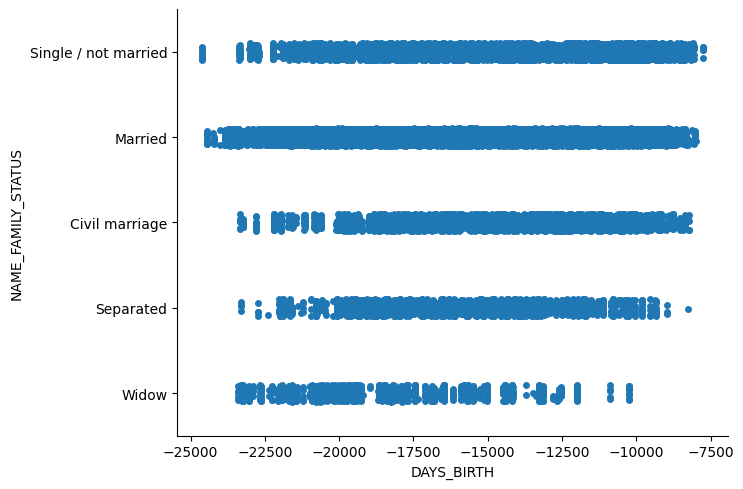

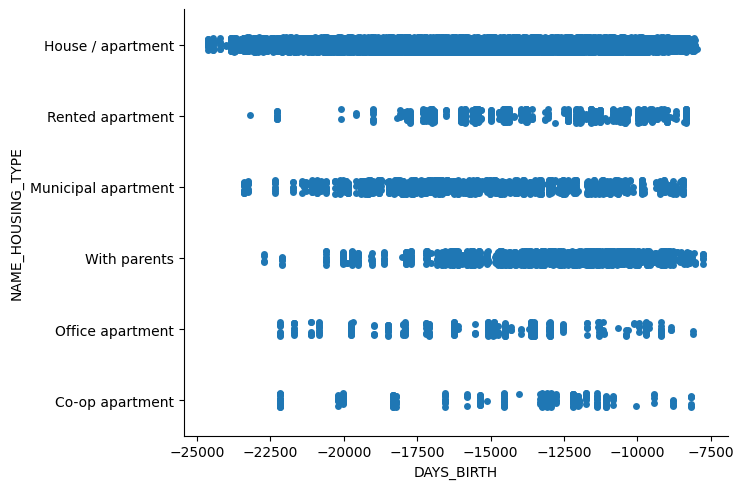

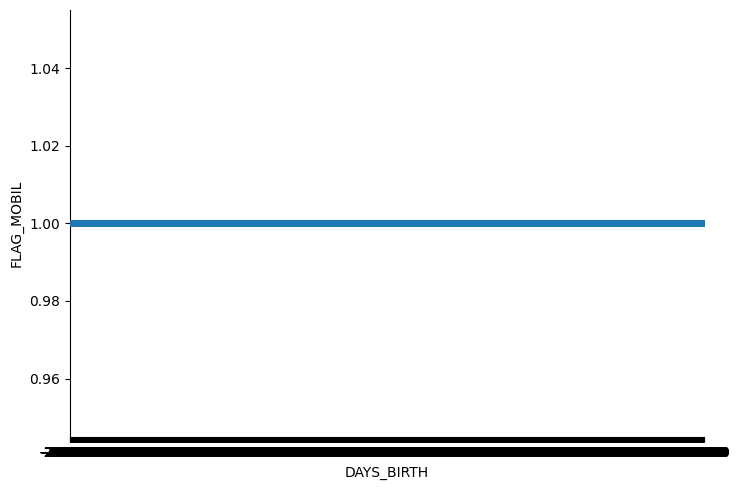

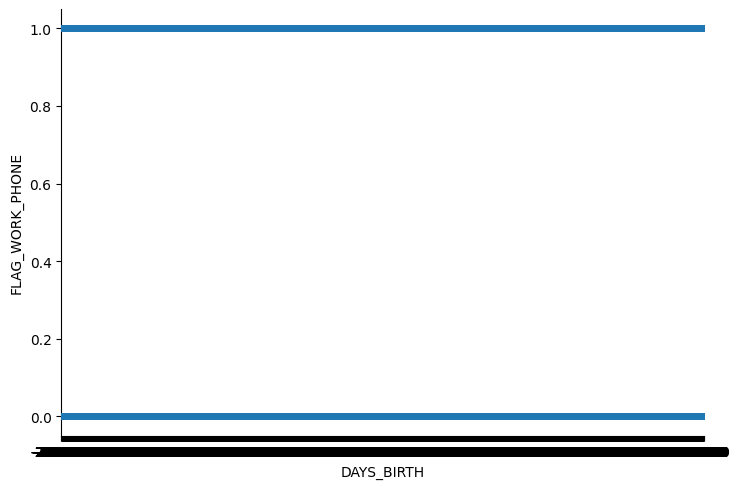

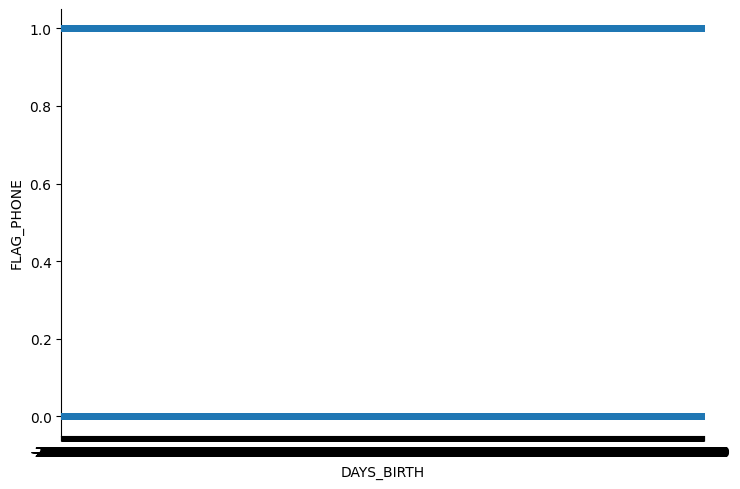

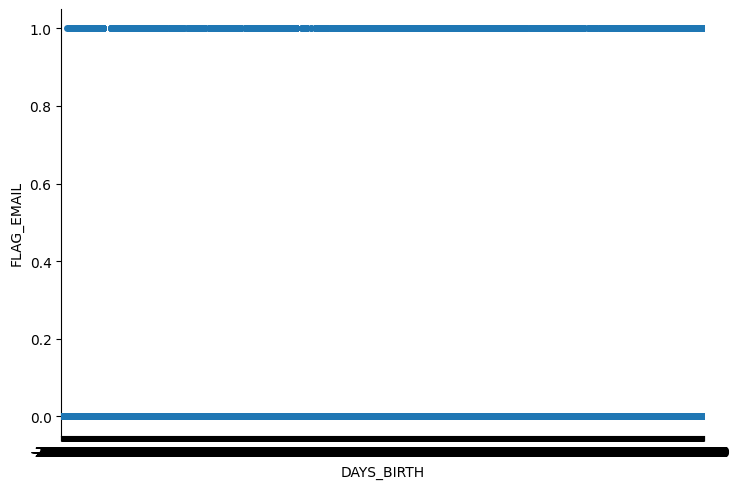

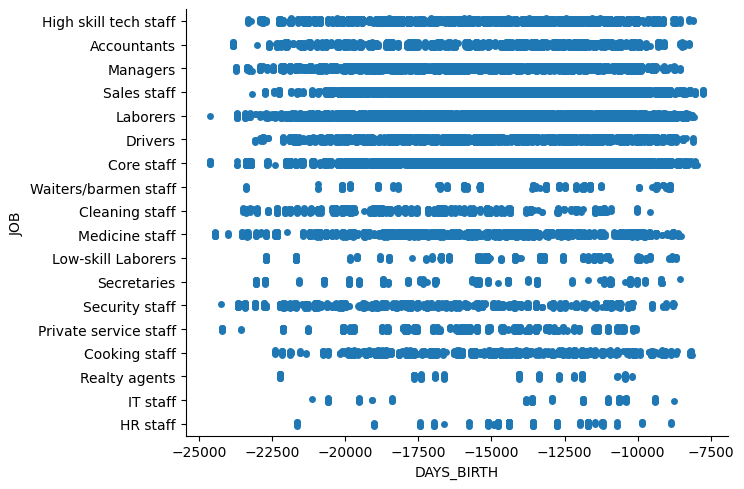

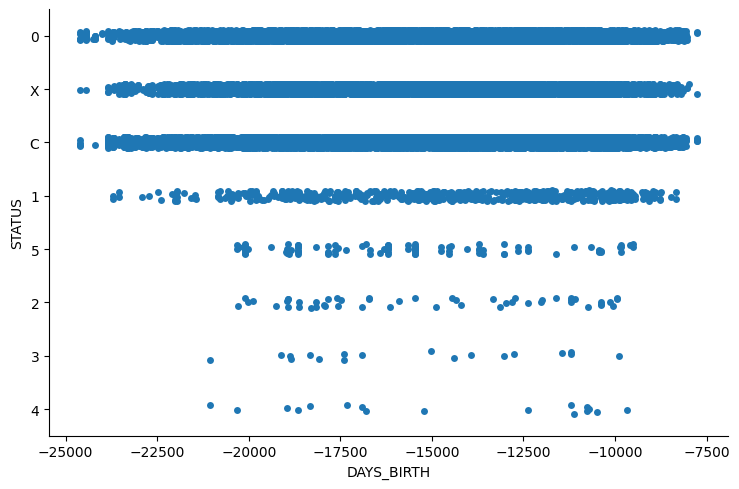

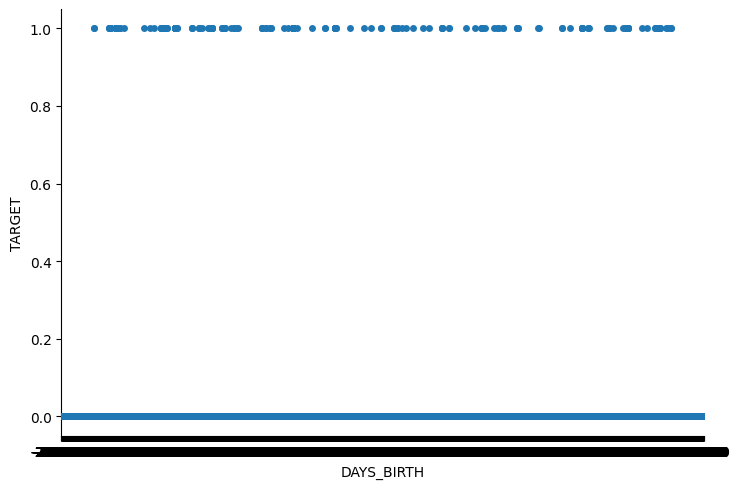

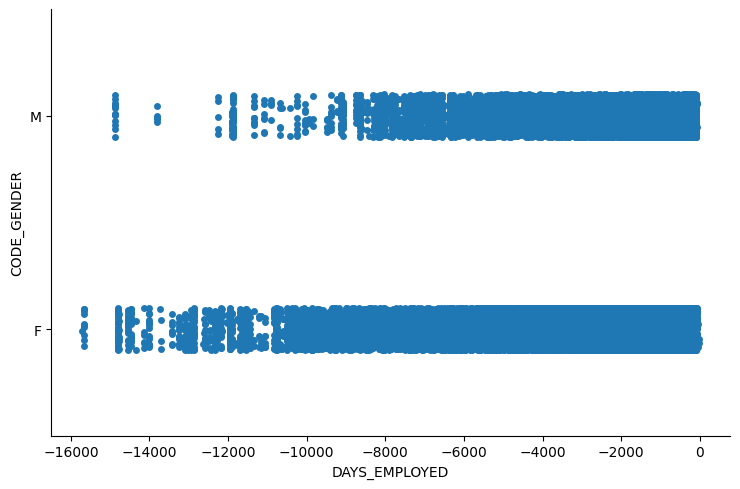

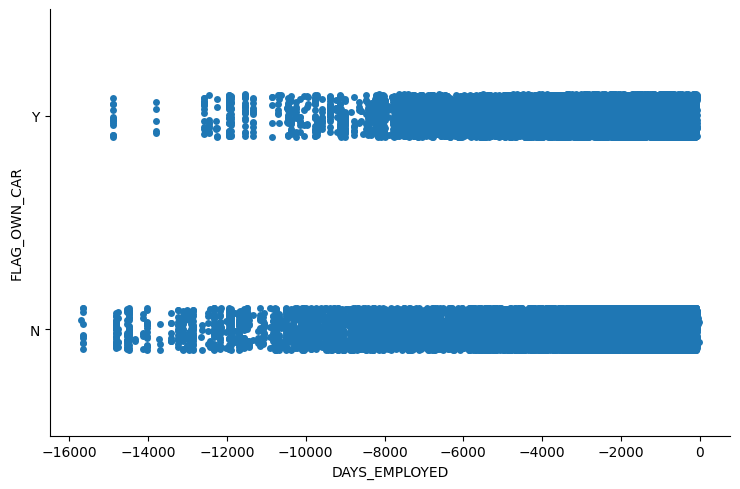

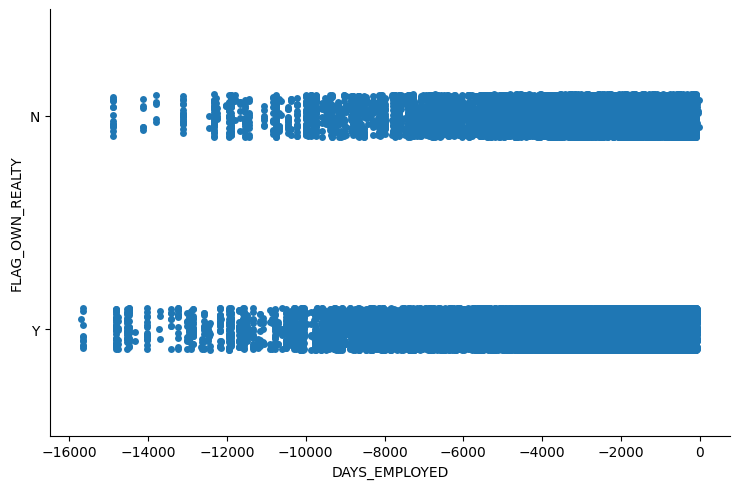

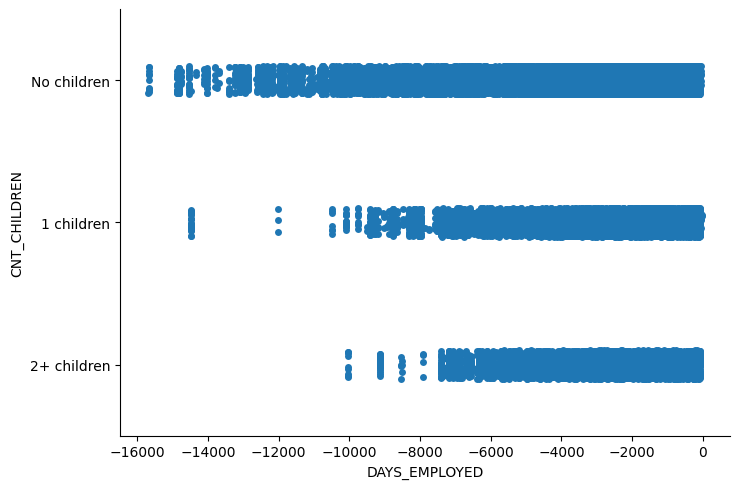

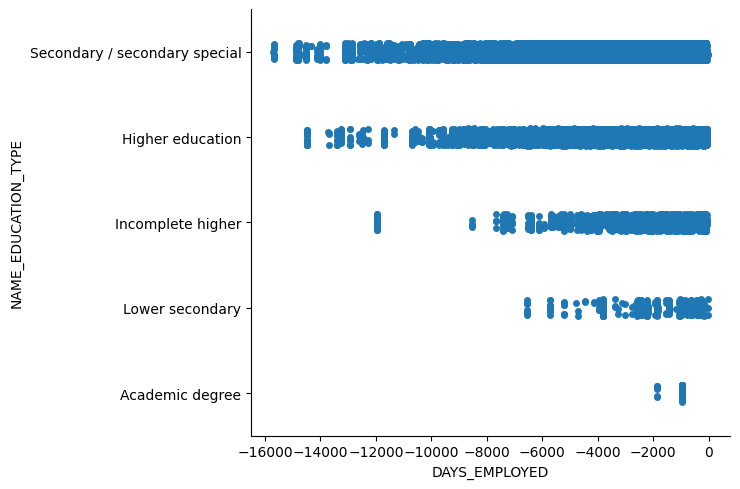

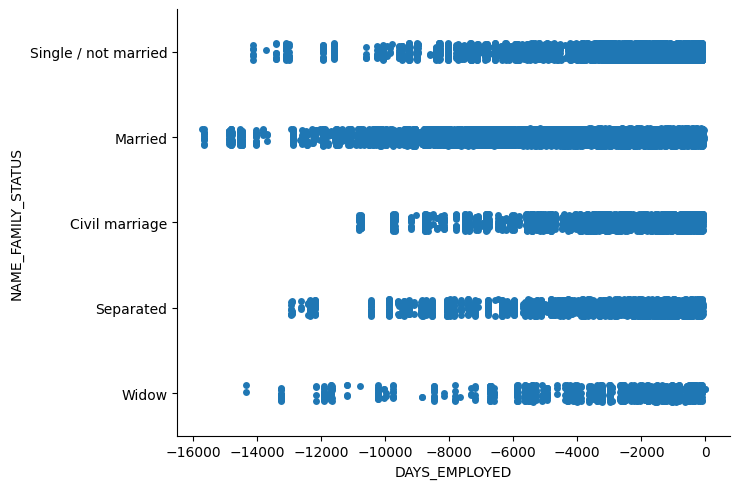

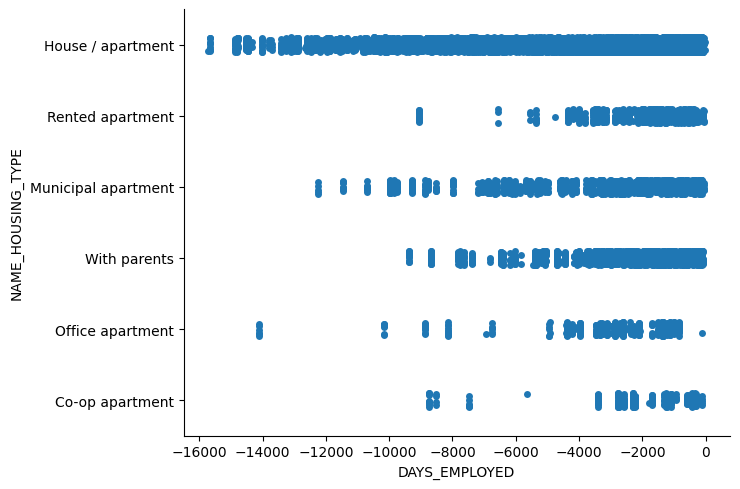

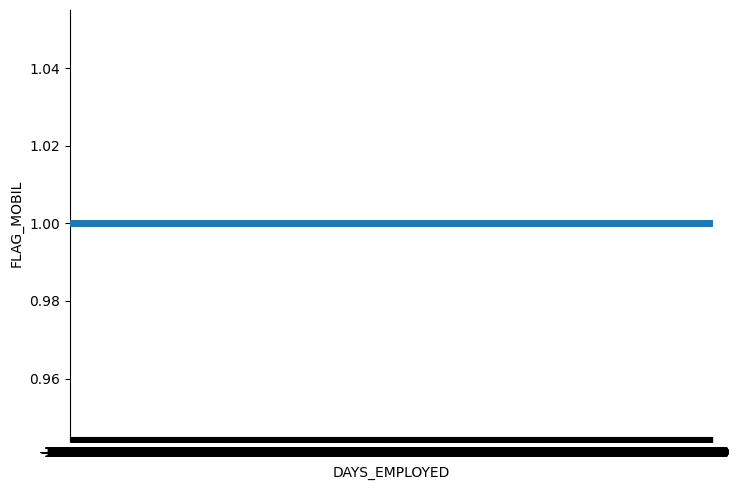

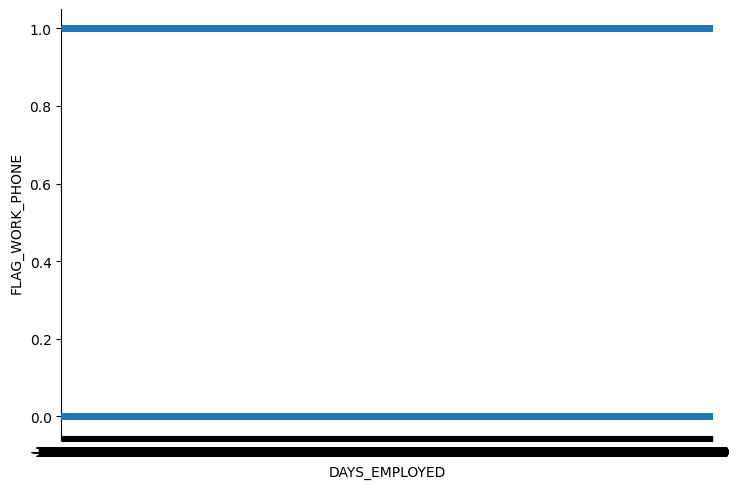

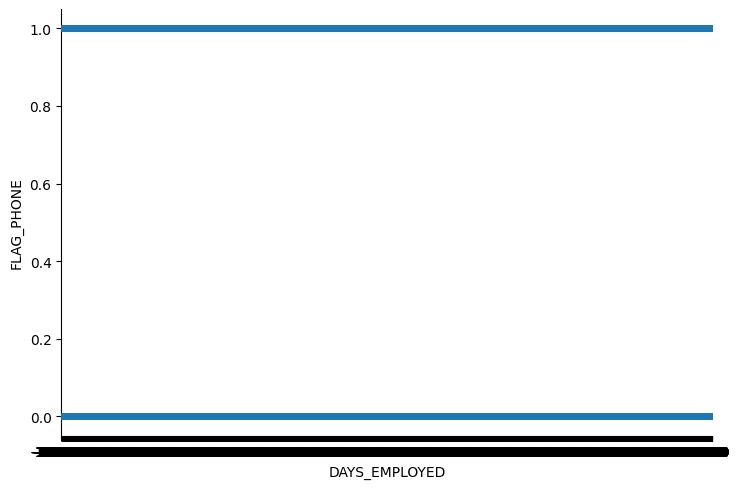

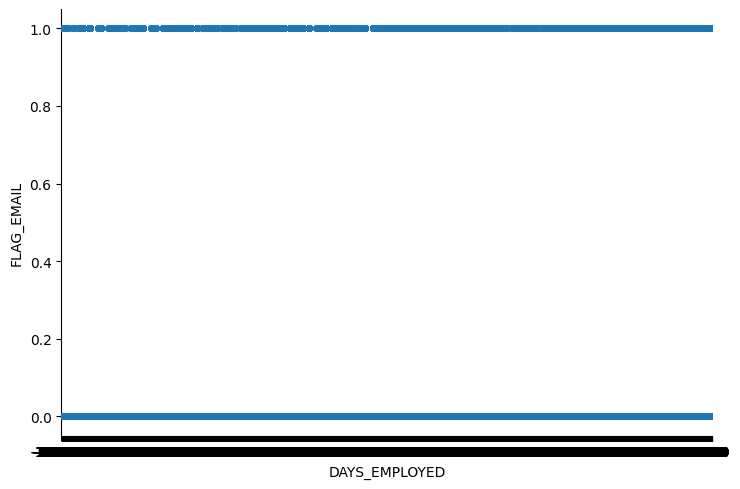

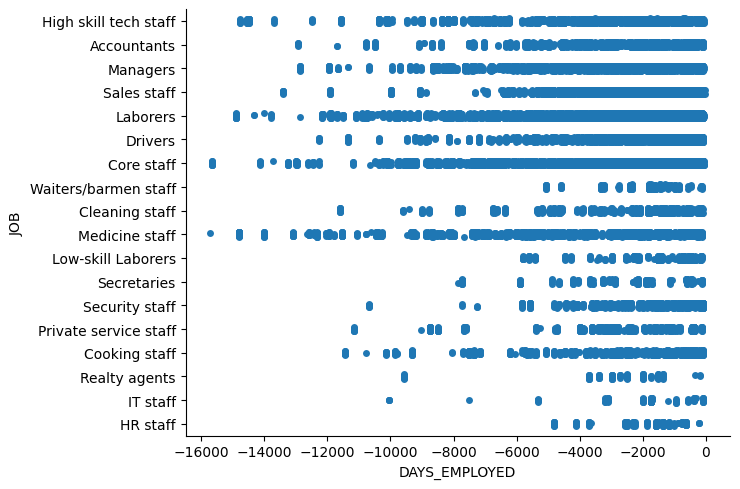

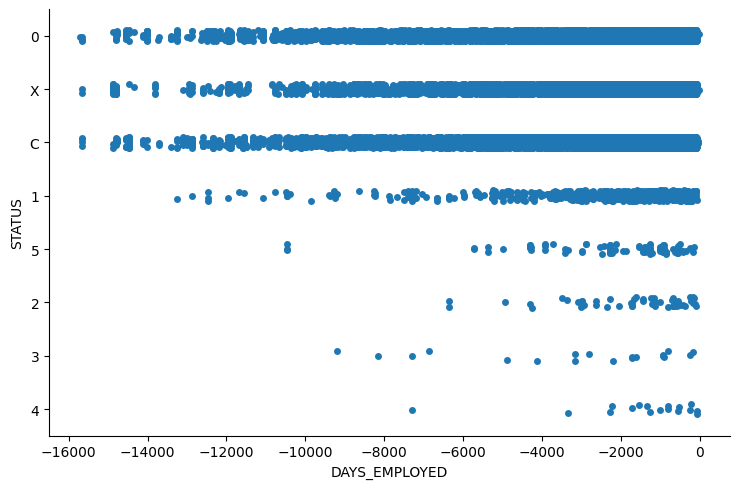

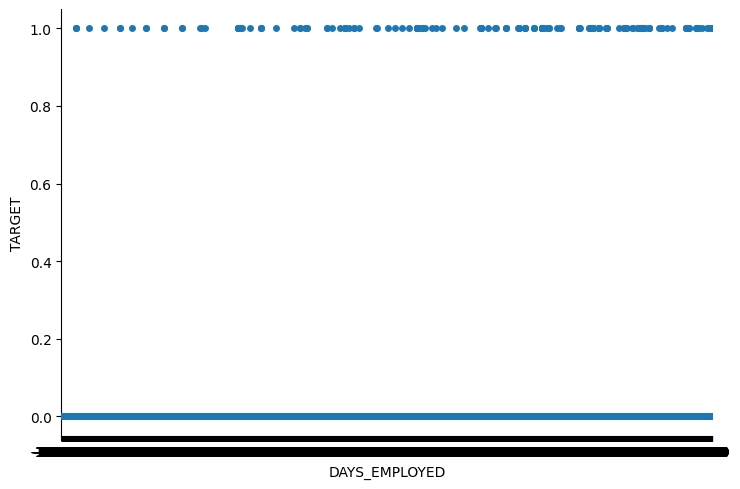

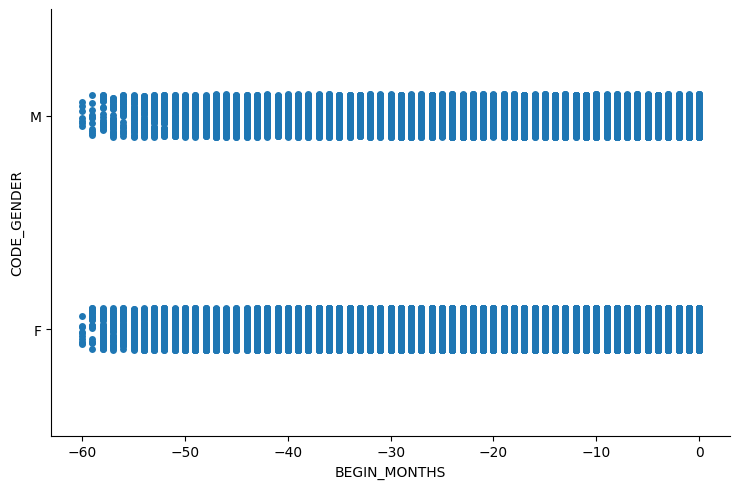

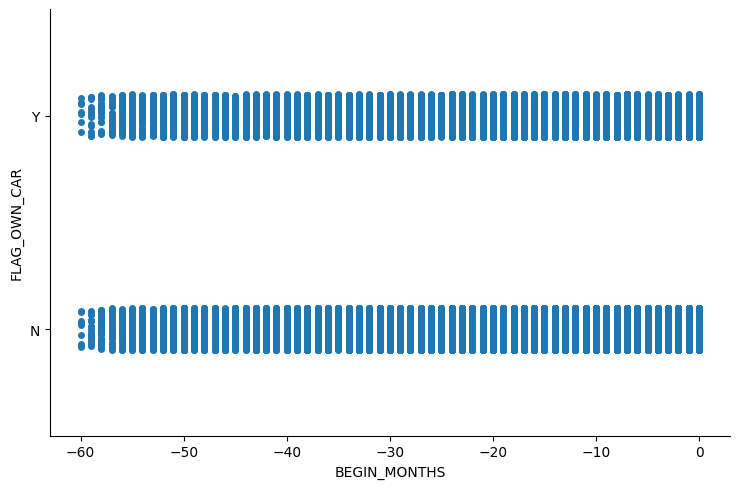

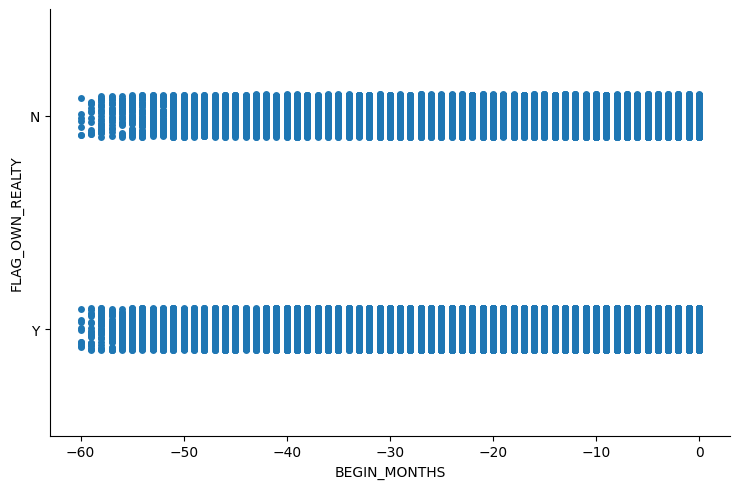

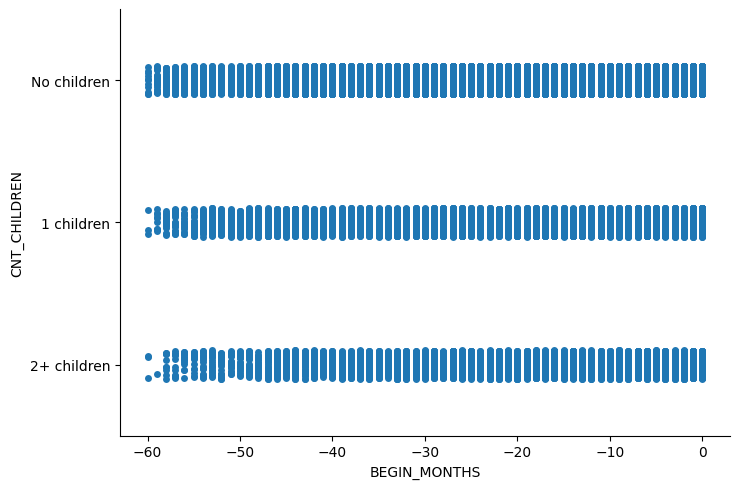

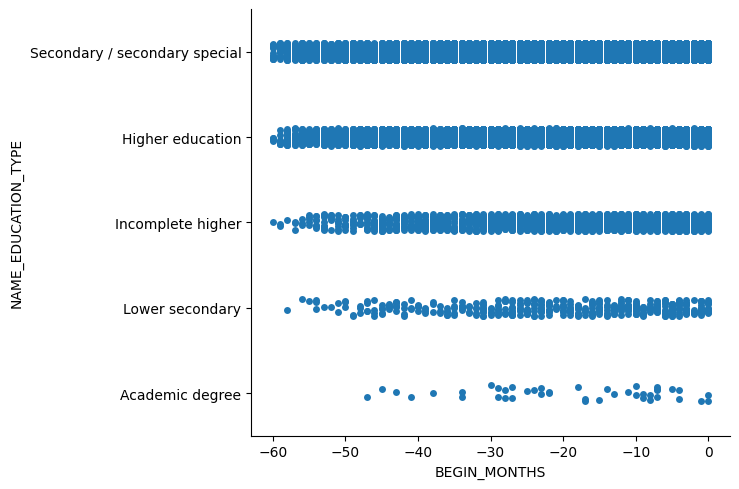

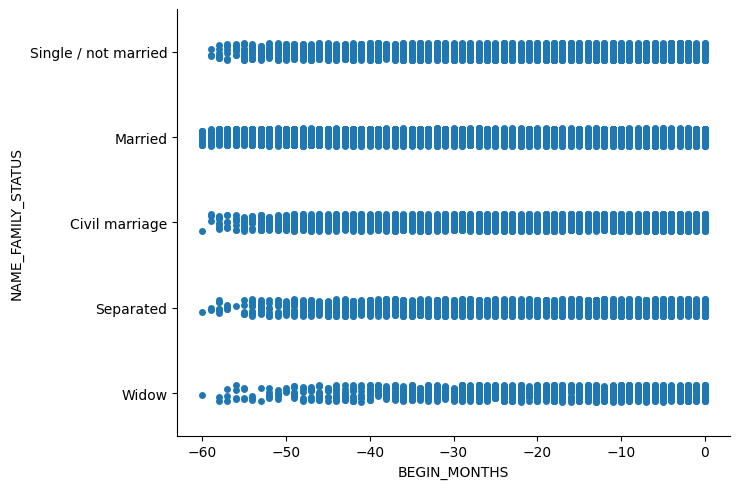

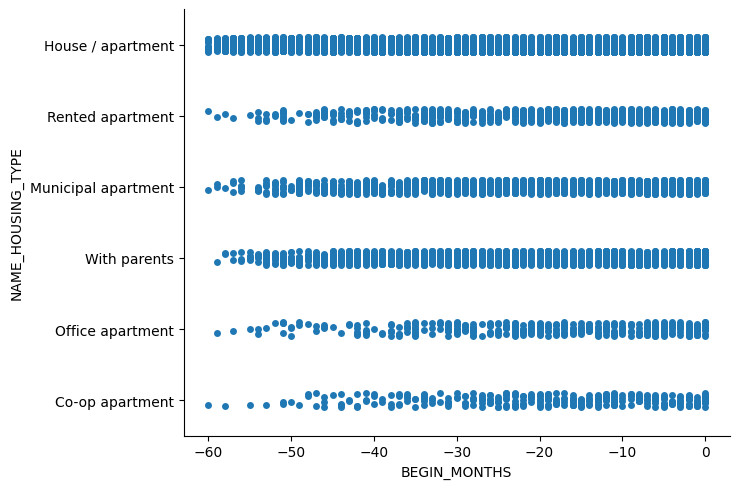

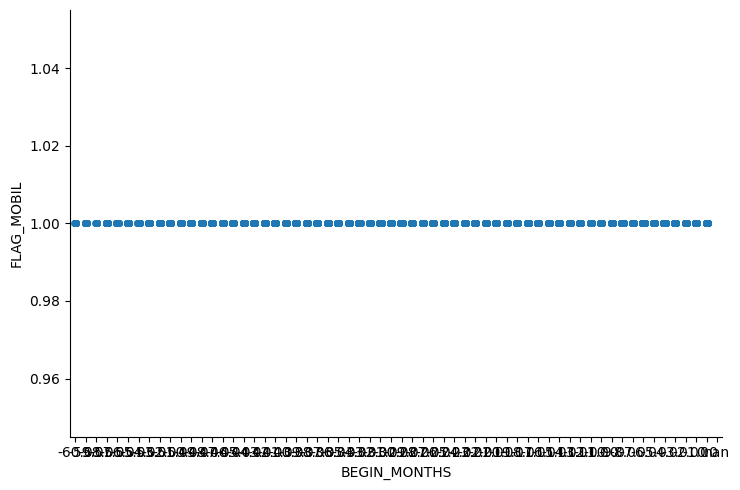

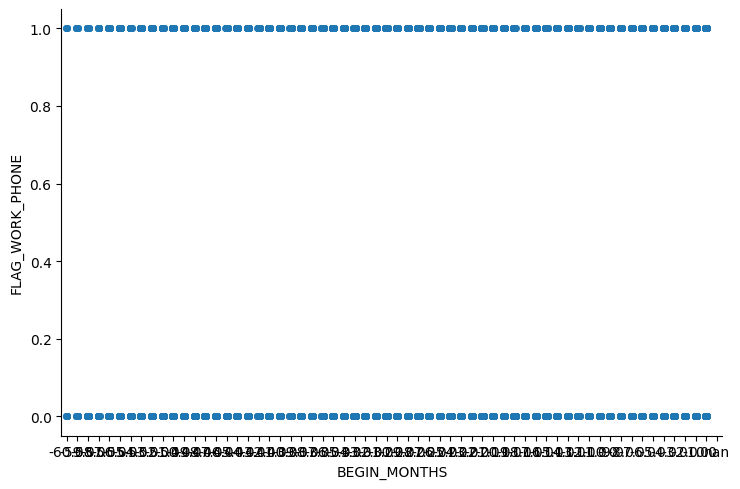

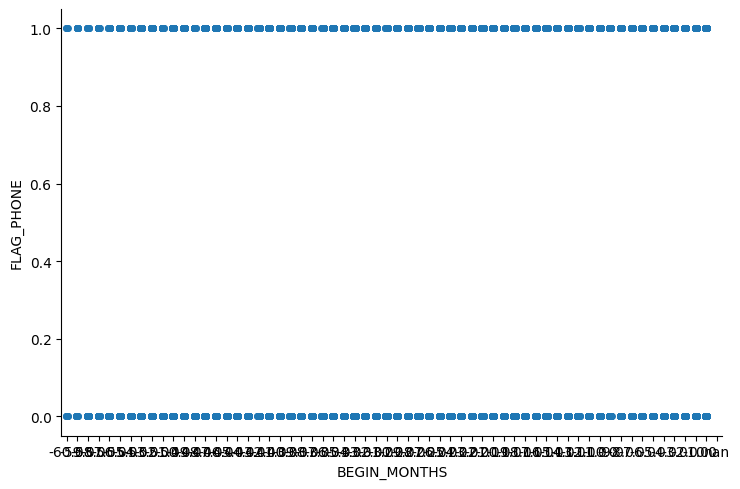

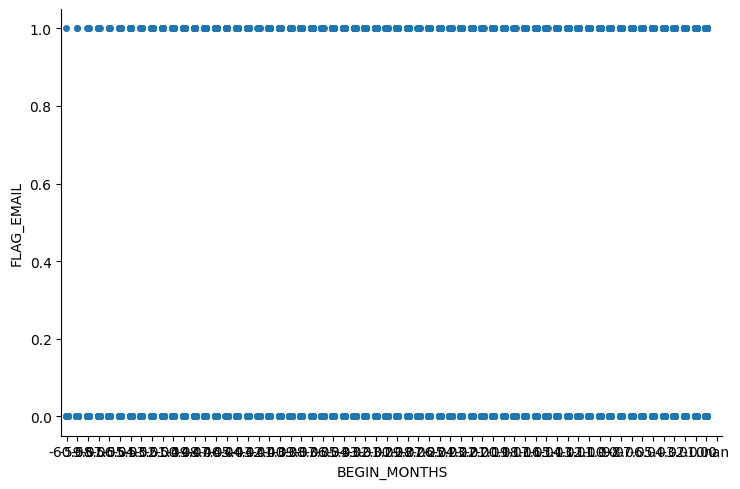

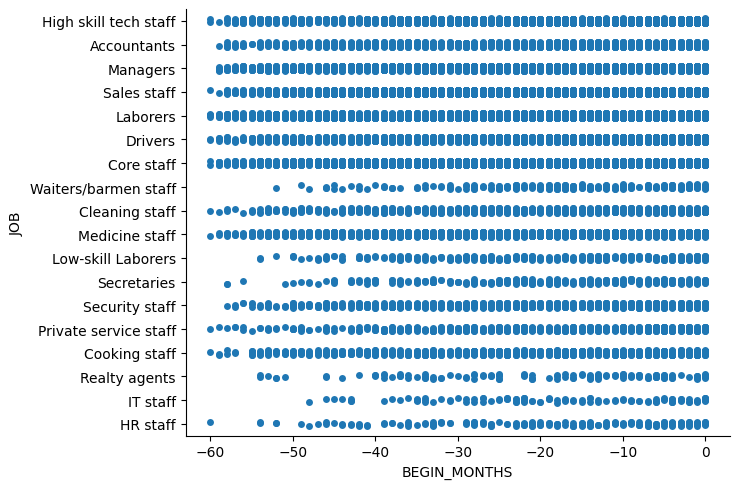

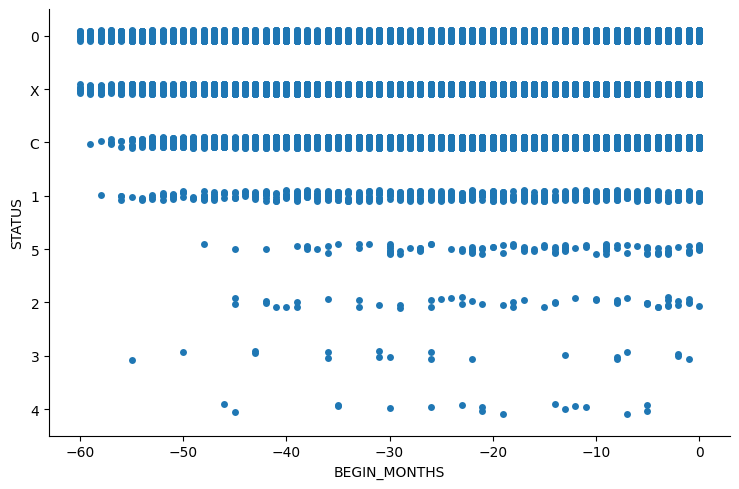

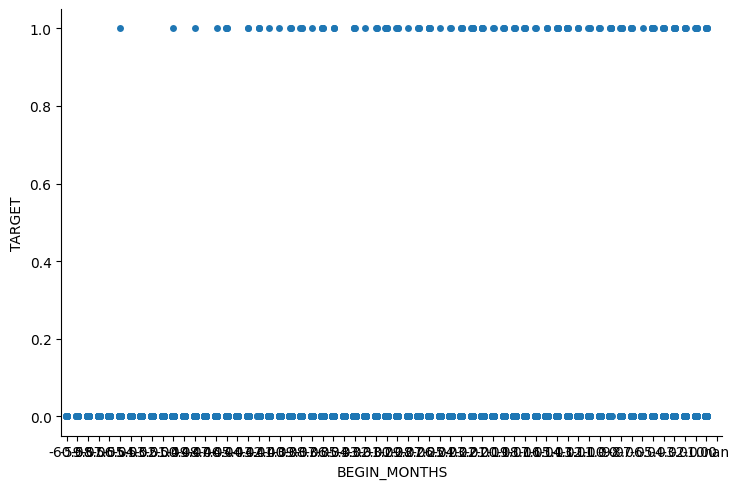

In [8]:
# Drop id column
try:
    _df.drop(columns=["ID"], inplace=True)
except:
    pass

y_columns = [column for column in _df.columns if column not in continuous_columns]

for x_column in continuous_columns:
    for y_column in y_columns:
        if x_column != y_column:
            sns.catplot(data=_df, x=x_column, y=y_column, height=5, aspect=1.5)
            plt.savefig(f'../../media/analyse/{x_column}-{y_column}__COR.png')